In [1]:
# Import the required libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os as os

In [3]:
# load the dataset

df = pd.read_csv("/Users/abhinavkunta/Desktop/haberman.csv")

In [5]:
# perform some basic operations for basic understanding of the data.

df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [20]:
# There are no column names in the data so let us assign the names for the columns.
df.columns = ["Age", "Year of operation", "Axillary nodes", "Status"]


In [21]:
df.head()

,Age,Year of operation,Axillary nodes,Status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [22]:
df.shape


(305, 4)

In [23]:
df.describe()

,Age,Year of operation,Axillary nodes,Status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [24]:
# Check if there are any null values
df.isnull().values.any()

False

In [26]:
# Count the survival status
df['Status'].value_counts()

# unfortunately there are 81 people who are not survived.

1    224
2     81
Name: Status, dtype: int64

# Univariate analysis

/Users/abhinavkunta/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/abhinavkunta/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


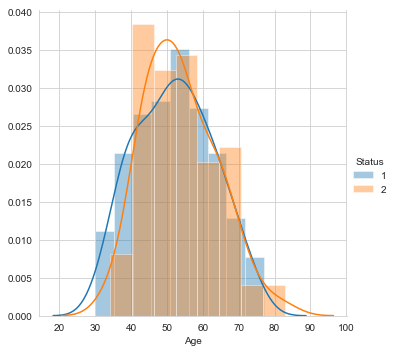

In [36]:
# Age distribution
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='Status',size=5).map(sns.distplot,'Age').add_legend()
plt.show()

/Users/abhinavkunta/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/abhinavkunta/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


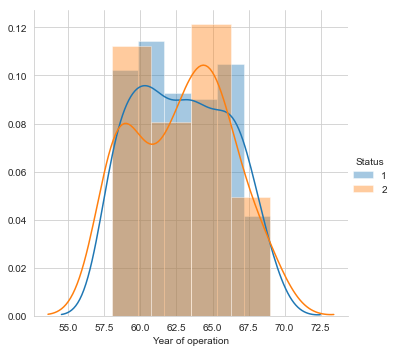

In [37]:
# year of operation

sns.set_style('whitegrid')
sns.FacetGrid(df,hue='Status',size=5).map(sns.distplot,'Year of operation').add_legend()
plt.show()

/Users/abhinavkunta/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/abhinavkunta/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


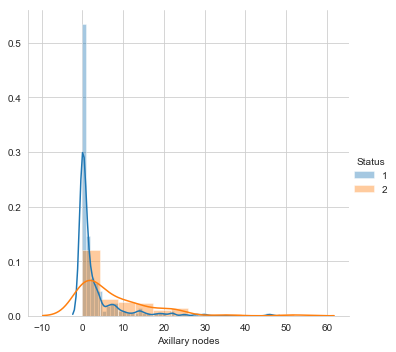

In [38]:
# Axillary nodes

sns.set_style('whitegrid')
sns.FacetGrid(df,hue='Status',size=5).map(sns.distplot,'Axillary nodes').add_legend()
plt.show()

# Observation:

1) The survival status is high if the patient has Axillary nodes < 5.                                   
2) We really can't judge anything between Age and Year of operation (mostly overlapping).

# PDF and CDF

///////////^^^^^^^^ Age ///////////^^^^^^^^
PDF is:  [0.01785714 0.03125    0.04464286 0.0625     0.04464286 0.08035714
 0.04017857 0.05357143 0.09821429 0.06696429 0.07589286 0.08928571
 0.04910714 0.04464286 0.08035714 0.03125    0.02232143 0.04017857
 0.01339286 0.01339286]
Edges are:  [30.   32.35 34.7  37.05 39.4  41.75 44.1  46.45 48.8  51.15 53.5  55.85
 58.2  60.55 62.9  65.25 67.6  69.95 72.3  74.65 77.  ]
///////////^^^^^^^^ Year of operation ///////////^^^^^^^^
PDF is:  [0.10714286 0.08035714 0.         0.10714286 0.         0.10267857
 0.         0.07142857 0.         0.09821429 0.09821429 0.
 0.06696429 0.         0.09821429 0.         0.09375    0.
 0.04464286 0.03125   ]
Edges are:  [58.   58.55 59.1  59.65 60.2  60.75 61.3  61.85 62.4  62.95 63.5  64.05
 64.6  65.15 65.7  66.25 66.8  67.35 67.9  68.45 69.  ]
///////////^^^^^^^^ Axillary nodes ///////////^^^^^^^^
PDF is:  [0.73214286 0.10267857 0.02678571 0.05357143 0.01339286 0.00892857
 0.02232143 0.00446429 0.00892857

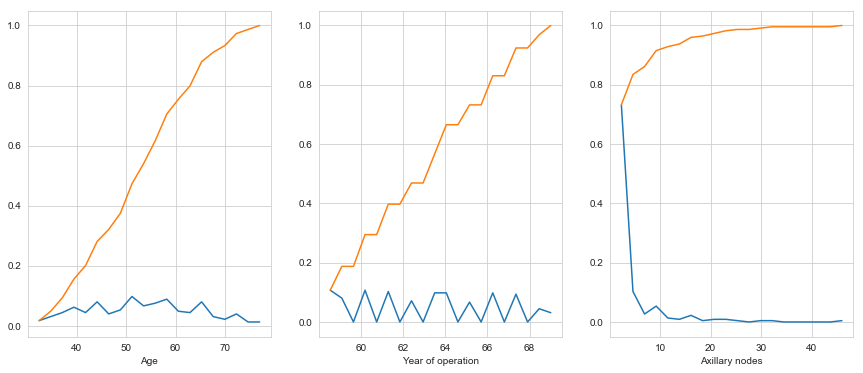

In [49]:
survived=df[df['Status']==1]
plt.figure(figsize=(20,6))
sns.set_style('whitegrid')      

for i,column in enumerate(list(df.columns[:-1])):
    plt.subplot(1,4,i+1)
    counts,bin_edges= np.histogram(survived[column],bins=20,density=True)
    print("///////////^^^^^^^^",column,"///////////^^^^^^^^")
    pdf=counts/sum(counts)
    print("PDF is: ",pdf)
    print("Edges are: ",bin_edges)

    cdf=np.cumsum(pdf)
    plt.plot(bin_edges[1:],pdf)
    plt.plot(bin_edges[1:],cdf)
    plt.xlabel(column)

# Observation:

1) Approximately 90% of the people survived if they have less than 10 Axillary nodes.                
2) Higher the Axillary nodes means lower the chances of survival.

# BOX Plot

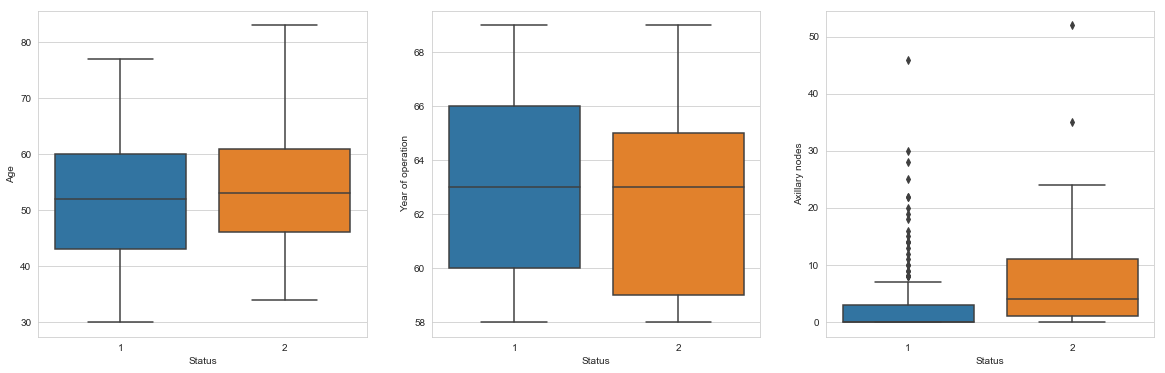

In [53]:
fig, ax = plt.subplots(1,3, figsize = (20,6))
for idx, feature in enumerate(df.columns[:-1]):
    sns.boxplot(x = 'Status' , y = feature , data = df , ax = ax[idx])
plt.show()

# Violin Plot

/Users/abhinavkunta/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


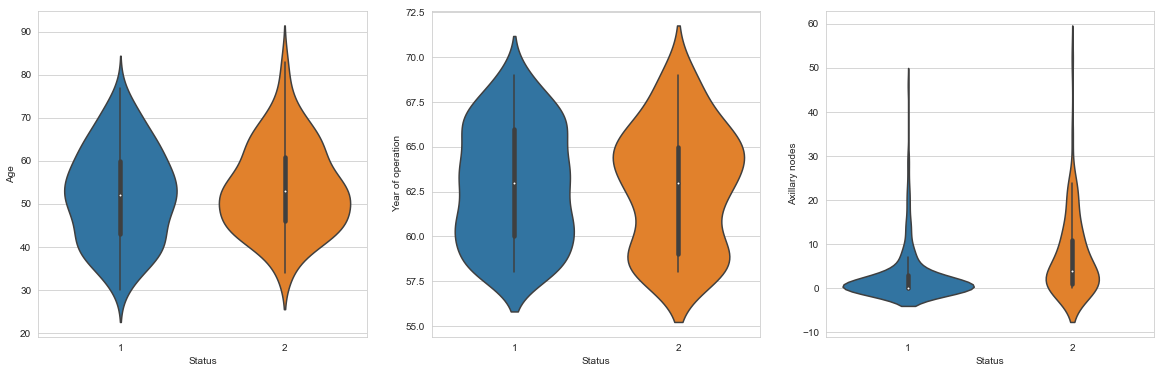

In [52]:
fig, ax = plt.subplots(1, 3, figsize= (20,6))
for idx, feature in enumerate(df.columns[:-1]):
    sns.violinplot(x = 'Status' , y = feature , data = df , ax = ax[idx])
plt.show()

# Observations of both Box and Violin plots

1) Most of the patients aged around 50-60 survived.                     
2) Patients who has Axillary nodes more than 8 has not survived.

# 2D - Scatter plot

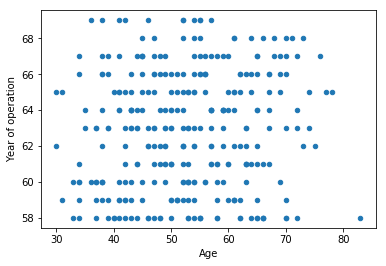

In [29]:
# plot for age and year of operation.

df.plot(kind='scatter', x='Age', y='Year of operation')
plt.show()

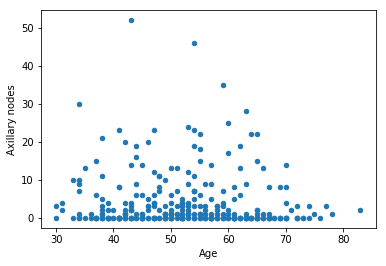

In [30]:
# plot for age and axillary nodes.

df.plot(kind='scatter', x='Age',y='Axillary nodes')
plt.show()

/Users/abhinavkunta/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/Users/abhinavkunta/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


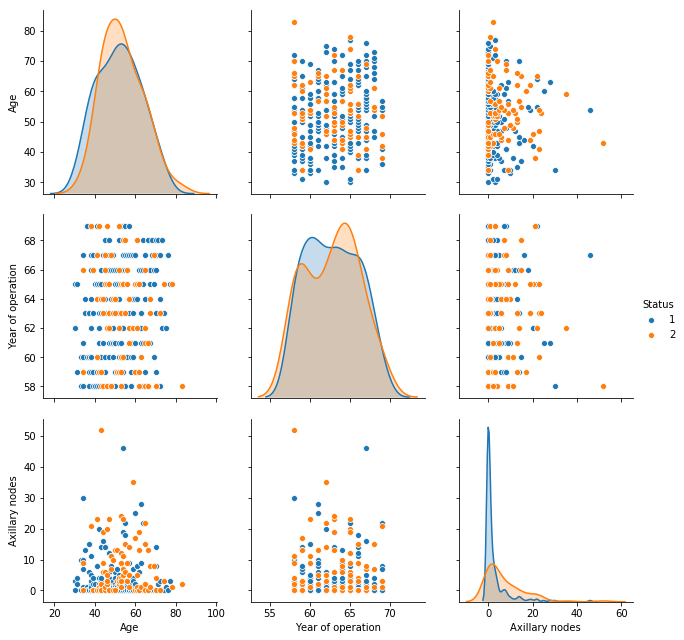

In [33]:
# Bivariate analysis.
#  pairplot for Class label "status" with "Age", "Year of operation", "axillary nodes" as x and y axes
plt.close()
sns.pairplot(df, hue="Status", vars=["Age", "Year of operation", "Axillary nodes"], size=3)
plt.show()

# Observation:

1) Axillary nodes doesn't depend on patient's age.                          
2) People with age less than 34 survived no matter of axillary nodes and year of operation.